In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5345,9526-JAWYF,Male,0,No,No,26,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,89.80,2335.3,Yes
5433,7879-CGSFV,Male,0,No,No,55,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Mailed check,100.90,5552.05,No
1777,2155-AMQRX,Female,0,No,No,28,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),54.90,1505.15,No
4134,3005-TYFRD,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),103.65,5676.65,No
5418,8490-BXHEO,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.55,1411.65,No
112,5712-AHQNN,Female,0,No,No,43,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,91.65,3954.1,No
5367,9227-YBAXE,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),82.50,5215.1,No
6429,6332-FBZRI,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No
484,5949-XIKAE,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
165,6345-FZOQH,Male,0,Yes,No,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1363.45,No


In [32]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
drop_col = ['customerID','PaymentMethod','PaperlessBilling']
data = data.drop(drop_col,axis=1)

In [4]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

In [6]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#data = data.dropna()
data = data[~data['TotalCharges'].isna()]

In [8]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.shape

(7032, 18)

In [7]:
print(data.sample(3))
replace_col = ['MultipleLines','OnlineSecurity',
              'DeviceProtection','TechSupport','StreamingTV',
               'StreamingMovies','OnlineBackup']
data[replace_col] = data[replace_col].replace('No internet service','No')
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
print(data.nunique())

     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2190   Male              0     Yes         No      71          Yes   
4095   Male              0      No         No       3          Yes   
6107   Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2190           Yes             DSL                   No                  Yes   
4095            No     Fiber optic                  Yes                   No   
6107            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2190                  Yes                  Yes                  Yes   
4095                   No                  Yes                   No   
6107  No internet service  No internet service  No internet service   

          StreamingMovies        Contract  MonthlyCharges  TotalCharges Churn  
2190                  Yes        

In [8]:
dict_seniorcitizen = {1:'Yes',0:'No'}
data['SeniorCitizen'] = data['SeniorCitizen'].map(dict_seniorcitizen)

In [9]:
cat_var = [i for i in data.columns if (data[i].nunique()<=3)&(i!='Churn') ]
print(cat_var)
continuous_var = [i for i in data.columns if (data[i].nunique()>3)&(i not in ['Churn','group_tenure'])]
print(continuous_var)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [10]:
data['group_tenure'] = pd.cut(data['tenure'],12)
data['group_tenure'].unique()

[(0.929, 6.917], (30.583, 36.5], (42.417, 48.333], (6.917, 12.833], (18.75, 24.667], ..., (12.833, 18.75], (54.25, 60.167], (48.333, 54.25], (66.083, 72.0], (36.5, 42.417]]
Length: 12
Categories (12, interval[float64]): [(0.929, 6.917] < (6.917, 12.833] < (12.833, 18.75] < (18.75, 24.667] ... (48.333, 54.25] < (54.25, 60.167] < (60.167, 66.083] < (66.083, 72.0]]

In [40]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,group_tenure
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No,"(0.929, 6.917]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No,"(30.583, 36.5]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes,"(0.929, 6.917]"
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No,"(42.417, 48.333]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes,"(0.929, 6.917]"


## EDA

['5163', '1869']
['No', 'Yes']


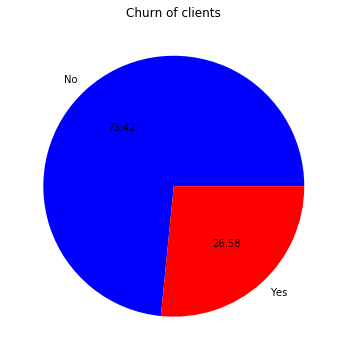

In [11]:
population = data['Churn'].value_counts().values.astype(str).tolist()
print(population)
label = data['Churn'].value_counts().keys().tolist() #.keys()也可以用.index
print(label)
plt.figure(figsize=(6,6))
plt.pie(data['Churn'].value_counts(),
        labels=label,colors=['b','r'],
       autopct='%.2f')
plt.title('Churn of clients')
plt.show()

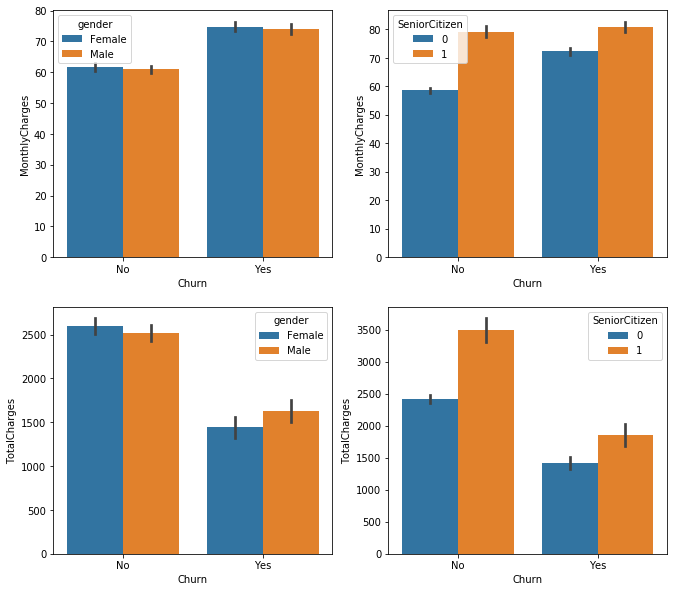

In [40]:
plt.figure(figsize=(11,10))
f1,f2,f3,f4= plt.subplot(221),plt.subplot(222),plt.subplot(223),plt.subplot(224)
sns.barplot(x='Churn',y='MonthlyCharges',data=data,hue='gender',ax=f1)
sns.barplot(x='Churn',y='MonthlyCharges',data=data,hue='SeniorCitizen',ax=f2)
sns.barplot(x='Churn',y='TotalCharges',data=data,hue='gender',ax=f3)
sns.barplot(x='Churn',y='TotalCharges',data=data,hue='SeniorCitizen',ax=f4)
plt.show()
##左上 流失客戶的平均月花費超過留存客戶的平均月花費，性別男女月花費差不多
##右上 老人平均月花費較高，且流失客戶的平均月花費超過留存客戶的平均月花費
##左下、右下顯示流失客戶的總花費少於存客戶的，性別影響不大，老人花的錢比較多
###性別欄位可以拿掉，老人花費較大，流失客戶的月花費較大，但也容易離開，導致流失客戶中的總花費金額較少

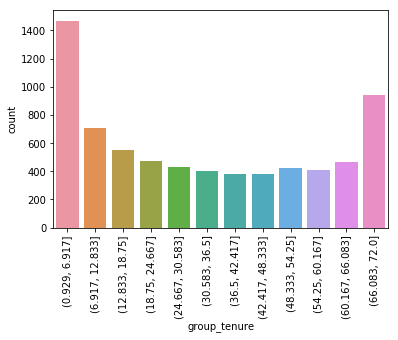

In [47]:
tenure_count = data.groupby(by = 'group_tenure').count().reset_index()
tenure_count = tenure_count.iloc[:,:2]
tenure_count.columns=['group_tenure','count']
tenure_count
sns.barplot(x='group_tenure',y='count',data=tenure_count)
plt.xticks(rotation='vertical')
plt.show()

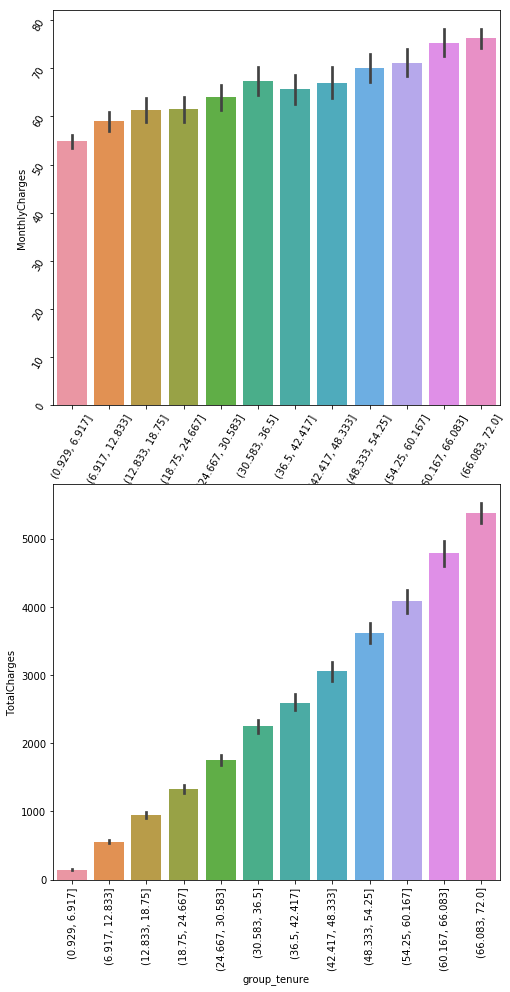

In [53]:
plt.figure(figsize=(8,16))
f1,f2 = plt.subplot(211),plt.subplot(212)
sns.barplot(x='group_tenure',y='MonthlyCharges',data=data,ax=f1)
f1.tick_params(labelrotation=60)
sns.barplot(x='group_tenure',y='TotalCharges',data=data,ax=f2)
plt.xticks(rotation='vertical')
plt.show()

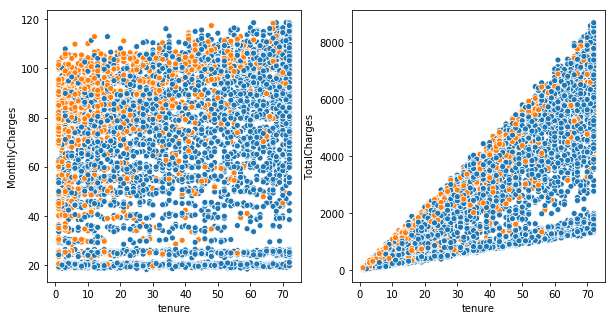

In [127]:
plt.figure(figsize=(10,5))
f1,f2 = plt.subplot(121),plt.subplot(122)
a = sns.relplot(x='tenure',y='MonthlyCharges',data=data,hue='Churn',ax=f1)
b = sns.relplot(x='tenure',y='TotalCharges',data=data,hue='Churn',ax=f2)
plt.close(a.fig)
plt.close(b.fig)
plt.show()

<Figure size 576x504 with 0 Axes>

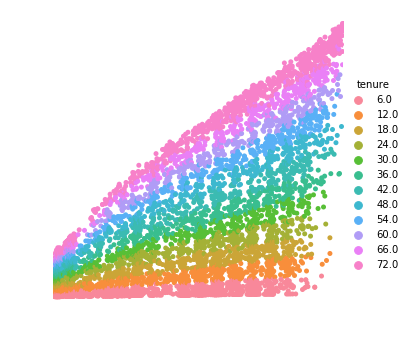

In [59]:
plt.figure(figsize=(8,7))
sns.catplot(x='MonthlyCharges',y='TotalCharges',data=data,hue='group_tenure')
plt.axis('off')
plt.show()

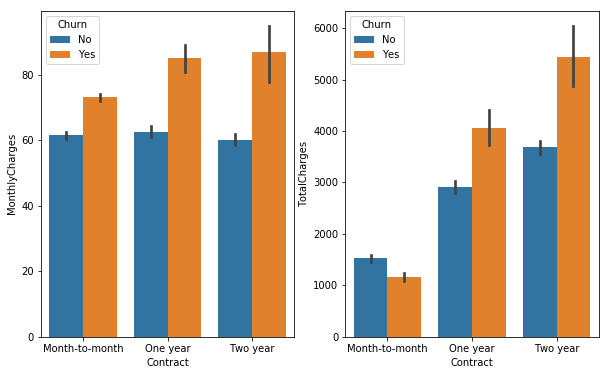

In [46]:
plt.figure(figsize=(10,6))
f1,f2 = plt.subplot(121),plt.subplot(122)
sns.barplot(x='Contract',y='MonthlyCharges',data=data,hue='Churn',ax=f1)
sns.barplot(x='Contract',y='TotalCharges',data=data,hue='Churn',ax=f2)

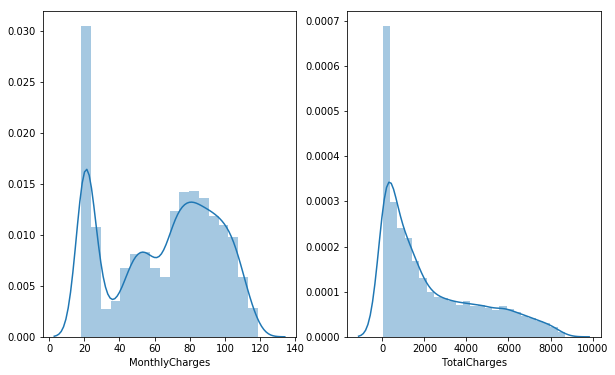

In [47]:
plt.figure(figsize=(10,6))
f1,f2 = plt.subplot(121),plt.subplot(122)
sns.distplot(data['MonthlyCharges'],ax=f1)
sns.distplot(data['TotalCharges'],ax=f2)

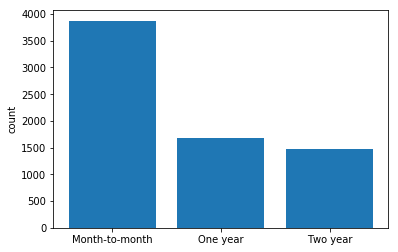

In [54]:
a = np.arange(3)
plt.bar(x=a,height=data['Contract'].value_counts())
plt.xticks(a,data['Contract'].unique())
plt.ylabel('count')
plt.show()

#data['Contract'].value_counts().plot(kind='bar')  與上面相同

In [11]:
y=data['Churn']
final_df= data.drop(['Churn'],axis=1)
one_hot_col = [i for i in cat_var if final_df[i].nunique()>2]
#one_hot_col
final_df = pd.get_dummies(final_df,columns=one_hot_col)
#final_df
tf_dict = {'Yes':1,'No':0}
tf_col = [i for i in cat_var if (i not in one_hot_col) and(i !='gender')]
tf_col
for i in tf_col:
    final_df[i] = final_df[i].map(tf_dict)
    ##dataframe無法直接使用.map()，要series才能使用，所以這邊必須使用迴圈
final_df['gender'] = final_df['gender'].map({'Male':1,'Female':0})
final_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,MonthlyCharges,TotalCharges,group_tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,29.85,29.85,"(0.929, 6.917]",1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,"(30.583, 36.5]",1,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,53.85,108.15,"(0.929, 6.917]",1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,"(42.417, 48.333]",1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,70.70,151.65,"(0.929, 6.917]",0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,84.80,1990.50,"(18.75, 24.667]",1,0,0,0,1,0
7039,0,0,1,1,72,1,1,0,1,1,...,1,103.20,7362.90,"(66.083, 72.0]",0,1,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,29.60,346.45,"(6.917, 12.833]",1,0,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,74.40,306.60,"(0.929, 6.917]",0,1,0,1,0,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()
final_df[continuous_var] = nor.fit_transform(final_df[continuous_var])

In [120]:
final_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,MonthlyCharges,TotalCharges,group_tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,0.115423,0.001275,"(0.929, 6.917]",1,0,0,1,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0.385075,0.215867,"(30.583, 36.5]",1,0,0,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,0.354229,0.010310,"(0.929, 6.917]",1,0,0,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,0.239303,0.210241,"(42.417, 48.333]",1,0,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0.521891,0.015330,"(0.929, 6.917]",0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0.662189,0.227521,"(18.75, 24.667]",1,0,0,0,1,0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,1,0.845274,0.847461,"(66.083, 72.0]",0,1,0,0,1,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0,0.112935,0.037809,"(6.917, 12.833]",1,0,0,1,0,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,0.558706,0.033210,"(0.929, 6.917]",0,1,0,1,0,0


In [13]:
X = final_df.drop('group_tenure',axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 21), (1407, 21), (5625,), (1407,))

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report
score =accuracy_score(y_test,y_pred)
score
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1039
         Yes       0.67      0.52      0.59       368

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [53]:
from sklearn.model_selection import cross_validate
y_train_1 = y_train.map({'Yes':1,'No':0})
cross_val = cross_validate(svc,X_train,y_train_1,scoring={'precision':'precision',
                                                          'recall':'recall'})
print('precision:%.4f'% cross_val['test_precision'].mean())
print('recall:{:.4f}'.format(cross_val['test_recall'].mean()))

precision:0.6446
recall:0.4777


## How to improve my model

    PCA
    Feature_selection(SBS ,random forest)
    SMOTE(imbalance samples)
    change algorithm

### PCA

In [37]:
X_pca_list = []
from sklearn.decomposition import PCA
for i in range(2,7):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_pca_list.append(X_pca)
len(X_pca_list)

5

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
report_list=[]
svc_pca = SVC()
for i in X_pca_list:    
    X_pca_train,X_pca_test,y_train,y_test = train_test_split(i,y,test_size=0.2,random_state=1)
    svc_pca.fit(X_pca_train,y_train)
    y_pred_pca = svc_pca.predict(X_pca_test)
    report = classification_report(y_test,y_pred_pca)
    report_list.append(report)

In [74]:
pca_var_num=2
for i in report_list:
    print('pca_var_num:',pca_var_num)
    print(i)
    print('---------------------')
    pca_var_num+=1
##pca幫助不大

pca_var_num: 2
              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1041
         Yes       0.60      0.46      0.52       366

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

---------------------
pca_var_num: 3
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.61      0.45      0.52       366

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

---------------------
pca_var_num: 4
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1041
         Yes       0.63      0.49      0.55       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      

### SMOTE(imbalance samples)

In [20]:
from imblearn.over_sampling import SMOTENC
cat_var_smote=[index for index,j in enumerate(X) if X[j].nunique()<=2]
cat_var_smote
smotenc = SMOTENC(categorical_features=cat_var_smote)
X_res,y_res = smotenc.fit_resample(X,y)

Using TensorFlow backend.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
X_sm_train,X_sm_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2)
svc_smote = SVC()
svc_smote.fit(X_sm_train,y_train)
y_pred_smote = svc_smote.predict(X_sm_test)
report = classification_report(y_test,y_pred_smote)
print(report)
##smote 效果不錯

              precision    recall  f1-score   support

          No       0.82      0.77      0.79      1014
         Yes       0.79      0.84      0.81      1052

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



### Feature_selection(SBS ,random forest)

###  random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=5)

In [36]:
rfc.fit(X_sm_train,y_train)
importances = rfc.feature_importances_
indice = np.argsort(importances)[::-1] ##np.argsort(importances)依變數的索引將重要性由低到高排序，[::-1]顛倒矩陣

In [53]:
print(importances)
print(np.argsort(importances)[::-1])
#len(indice)
##第18個變數最重要
name_index = np.array(X.columns)

[0.00111301 0.0016741  0.00388479 0.02125872 0.15000959 0.00284099
 0.00433896 0.03336063 0.00400008 0.0024811  0.02775994 0.0044613
 0.00923122 0.09369734 0.07080858 0.02802146 0.07454151 0.06217011
 0.24228365 0.04174823 0.12031471]
[18  4 20 13 16 14 17 19  7 15 10  3 12 11  6  8  2  5  9  1  0]


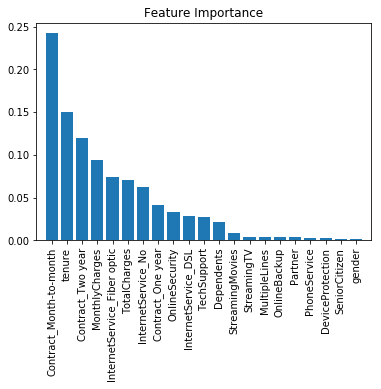

In [51]:
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), 
        importances[indice],
        align='center')

plt.xticks(range(X.shape[1]), 
           name_index[indice], 
           rotation=90)
plt.xlim([-1, X.shape[1]])
#plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()